Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
*****************
Features: Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')
Labels: output
Data Shape: (303, 14)
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
age         0
sex         0
cp          0
trtbps    

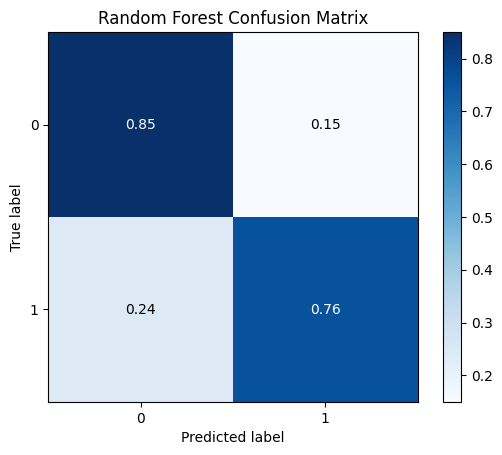

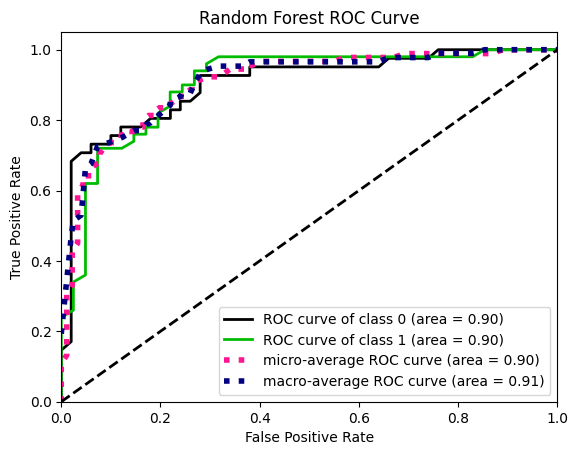

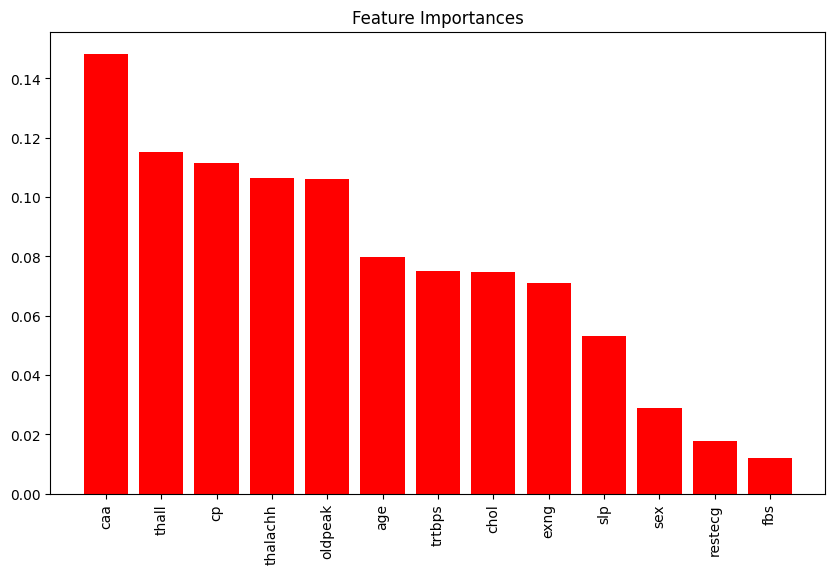

Model performans sonuçları kaydedildi.


In [ ]:
!pip install scikit-plot

# Google Drive ile bağlantı kurma
from google.colab import drive
drive.mount('/content/drive')

# Gerekli kütüphaneleri yükleme
import pandas as pd
import scikitplot as skplt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

print("*****************")

# Veri setini okuma
data_path = "/content/drive/MyDrive/proje/heart.csv"  # Veri setinin yolu
data = pd.read_csv(data_path)

# Veri setindeki 14 özelliğin isimlerini yazdır
print("Features:", data.columns[:-1])

# Veri etiket türlerini yazdır
print("Labels:", data.columns[-1])

# Veri özellik şeklini yazdır
print("Data Shape:", data.shape)

# Veri setini gözlemleme
print(data.head())  # Veri setinin ilk birkaç (5) gözlemi

# Ön işleme adımları
# Eksik değerleri kontrol etme
print(data.isnull().sum())  # Eksik değerleri sayma

# Bağımlı ve bağımsız değişkenleri belirleme
X = data.drop("output", axis=1)  # Bağımsız değişkenler
y = data["output"]  # Bağımlı değişken

# Verileri ölçeklendirme veya normalize etme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veri setini train ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Sınıflandırma algoritmalarını tanımlama
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=1000)
}

# Hyperparameter Tuning
param_grid = {
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10, 100]},
    "K-Nearest Neighbors": {'n_neighbors': [3, 5, 7, 9]},
    "Decision Tree": {'max_depth': [None, 10, 20, 30]},
    "Random Forest": {'n_estimators': [50, 100, 200]},
    "Support Vector Machine": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "Gradient Boosting Classifier": {'n_estimators': [50, 100, 200]},
    "AdaBoost Classifier": {'n_estimators': [50, 100, 200]},
    "MLP Classifier": {'hidden_layer_sizes': [(50,), (100,), (50,50)]}
}

# Her bir modeli eğitme ve değerlendirme
best_estimators = {}
for name, model in models.items():
    print(f"Training {name}...")
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_estimators[name] = best_model
    else:
        model.fit(X_train, y_train)
        best_estimators[name] = model
    accuracy = cross_val_score(best_estimators[name], X_scaled, y, cv=5).mean()
    print(f"{name}: Cross-Validation Accuracy = {accuracy:.4f}")

# Her bir model için performans metriklerini hesaplama ve yazdırma
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)  # Tahmin yapma

    # Performans metriklerini hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Performans metriklerini yazdırma
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print()

# Ensemble Model oluşturma
ensemble_model = VotingClassifier(estimators=[(name, model) for name, model in best_estimators.items()], voting='soft')
ensemble_model.fit(X_train, y_train)
ensemble_accuracy = ensemble_model.score(X_test, y_test)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")

# Yeni veri setini yükleyip ön işleme adımlarını gerçekleştirme
new_data_path = "/content/drive/MyDrive/proje/heart.csv"  # Yeni veri setinin yolu
new_data = pd.read_csv(new_data_path)

# En iyi performans gösteren modeli seçme
best_model_name = "Random Forest"  # En iyi modelin adı
best_model = best_estimators[best_model_name]  # En iyi modeli seçme

# Yeni veri seti üzerinde tahmin yapma
X_new = new_data.drop("output", axis=1)  # Bağımsız değişkenler
X_new_scaled = scaler.transform(X_new)
y_new_pred = best_model.predict(X_new_scaled)  # Tahmin yapma

# Tahminleri değerlendirme
# Örneğin, tahminler üzerinde bir performans metriği hesaplayabilirsiniz veya tahminlerinizi görselleştirebilirsiniz.

# Confusion matrix çizimi
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.title(f"{best_model_name} Confusion Matrix")
plt.show()

# ROC eğrisi çizimi
if not isinstance(best_model, SVC):
    y_prob = best_model.predict_proba(X_test)  # Sınıflandırma olasılıklarını al
    skplt.metrics.plot_roc(y_test, y_prob, title=f"{best_model_name} ROC Curve")
    plt.show()

# Feature Importance Grafiği çizimi
if isinstance(best_model, RandomForestClassifier):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices],
            color="r", align="center")
    plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()
else:
    print("Feature importance grafiği sadece Random Forest modelleri için desteklenmektedir.")

# Model performans sonuçlarını bir CSV dosyasına kaydetme
results = []
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)  # Tahmin yapma

    # Performans metriklerini hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    })

results_df = pd.DataFrame(results)
results_df.to_csv('/content/drive/MyDrive/proje/model_results.csv', index=False)

print("Model performans sonuçları kaydedildi.")
